<a href="https://colab.research.google.com/github/YuanQi-ME/hello-world/blob/master/Nonlinear_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start with Nonlinear curve fitting**

Basically follow the instruction from
https://colab.research.google.com/drive/11A5Td8nxGSbThzL0NPwwv-E5GpBa0Fv9

I will use hyperelastic model as example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

print(tf.__version__)

2.2.0


# **Generate data** 
For Neo Hookean model, for uniaxial tension test, 
$W = \frac{\mu}{2} (I - 3) = \frac{\mu}{2} (\lambda^2 + \frac{2}{\lambda} - 3)$

The corresponding nominal stress
$S = \mu (\lambda - \frac{1}{\lambda^2})$

Here, for simplicity, assume $\mu = 1$, all units are omitted.


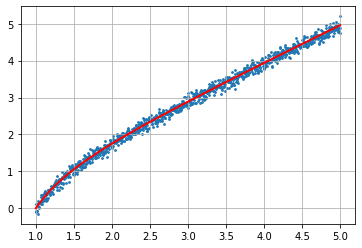

In [7]:
x_data = np.linspace(1, 5, num = 1000)
y_data_true = x_data - 1/x_data**2  # theoretical data

y_data = y_data_true + 0.1*np.random.normal(size=1000)  # add experiment noise

plt.scatter(x_data, y_data, s=3)
plt.plot(x_data, y_data_true, 'r', linewidth = 2)
plt.grid()
plt.show()

# **Create neuro network**

Create two layers each contains 10 units

In [8]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(20, activation = 'relu'))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(20, activation = 'relu'))
# model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(5, activation = 'relu'))
# model.add(keras.layers.Dense(5, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


# **Train**

100 epochs

In [12]:
model.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 13/100
32/32 [=================

# **Predict**


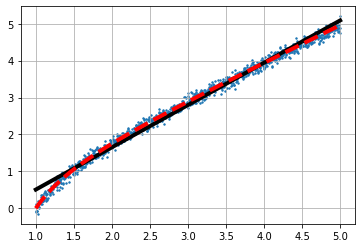

In [13]:
y_predict = model.predict(x_data)

plt.scatter(x_data, y_data, s=2)
plt.plot(x_data, y_predict, 'k', linewidth = 4)
plt.plot(x_data, y_data_true, 'r--', linewidth = 4)
plt.grid()
plt.show()

# **Discussion**
Notice that it was almost linear fit. Especially, for the stretch ratio close to $\lambda = 1$, the nonlinear character was not well captured. 

Next, we try to divide the dataset into several batches.